In [0]:
import numpy as np
import pandas as pd

In [0]:
df = spark.read.csv("/FileStore/tables/retail.csv", header=True, sep=',')
df = df.toPandas()

In [0]:
# alteração dos formatos das colunas

df['quantity'] = df['quantity'].astype(int)
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['unit_price'] = df['unit_price'].str.replace(',','.').astype(float)
df['customer_id'] =  df['customer_id'].astype(float)

In [0]:
# remoção de cancelamentos

df = (
    df
    .assign(start_with_c = lambda x: x['invoice_no'].str.startswith('C'))
    .query('start_with_c == False')
    .query('quantity >= 0')
)

In [0]:
# criação das colunas com ano, mês e quarter dos invoices

df['mês'] = pd.DatetimeIndex(df['invoice_date']).month
df['ano'] = pd.DatetimeIndex(df['invoice_date']).year
df['quarter'] = pd.DatetimeIndex(df['invoice_date']).quarter

In [0]:
# busca da região mais frequente

df.groupby('region').agg(n=('invoice_no', 'count')).sort_values('n', ascending=False).reset_index()

,region,n
0,United Kingdom,486286
1,Germany,9042
2,France,8408
3,EIRE,7894
4,Spain,2485
5,Netherlands,2363
6,Belgium,2031
7,Switzerland,1967
8,Portugal,1501
9,Australia,1185


In [0]:
df[df['region']=='United Kingdom'].shape[0]/df.shape[0]

Out[45]: 0.9143195628786382

In [0]:
df['lucro/perda'] = df['quantity']*df['unit_price']

In [0]:
# busca do produto mais frequente

produto = df[df['quantity']>0]
produto[['invoice_no','description']].groupby('description').count().sort_values('invoice_no', ascending=False).head(20).reset_index()

,description,invoice_no
0,WHITE HANGING HEART T-LIGHT HOLDER,2327
1,JUMBO BAG RED RETROSPOT,2115
2,REGENCY CAKESTAND 3 TIER,2019
3,PARTY BUNTING,1707
4,LUNCH BAG RED RETROSPOT,1594
5,ASSORTED COLOUR BIRD ORNAMENT,1489
6,SET OF 3 CAKE TINS PANTRY DESIGN,1399
7,PACK OF 72 RETROSPOT CAKE CASES,1370
8,LUNCH BAG BLACK SKULL.,1328
9,NATURAL SLATE HEART CHALKBOARD,1263


In [0]:
# busca do produto mais vendido

produto_mais_vendido = df.groupby('description').agg(n_vendas=('quantity', 'sum'), descricao=('description','first'), lucro=('lucro/perda', 'sum')).sort_values('n_vendas', ascending=False)
produto_mais_vendido

,n_vendas,descricao,lucro
description,,,
"PAPER CRAFT , LITTLE BIRDIE",80995,"PAPER CRAFT , LITTLE BIRDIE",168469.60
MEDIUM CERAMIC TOP STORAGE JAR,78033,MEDIUM CERAMIC TOP STORAGE JAR,81700.92
WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047,WORLD WAR 2 GLIDERS ASSTD DESIGNS,13841.85
JUMBO BAG RED RETROSPOT,48478,JUMBO BAG RED RETROSPOT,94340.05
WHITE HANGING HEART T-LIGHT HOLDER,37895,WHITE HANGING HEART T-LIGHT HOLDER,106292.77
...,...,...,...
CAKE STAND LACE WHITE,1,CAKE STAND LACE WHITE,4.25
SET 12 COLOURING PENCILS DOILEY,1,SET 12 COLOURING PENCILS DOILEY,0.65
TINY CRYSTAL BRACELET RED,1,TINY CRYSTAL BRACELET RED,2.48


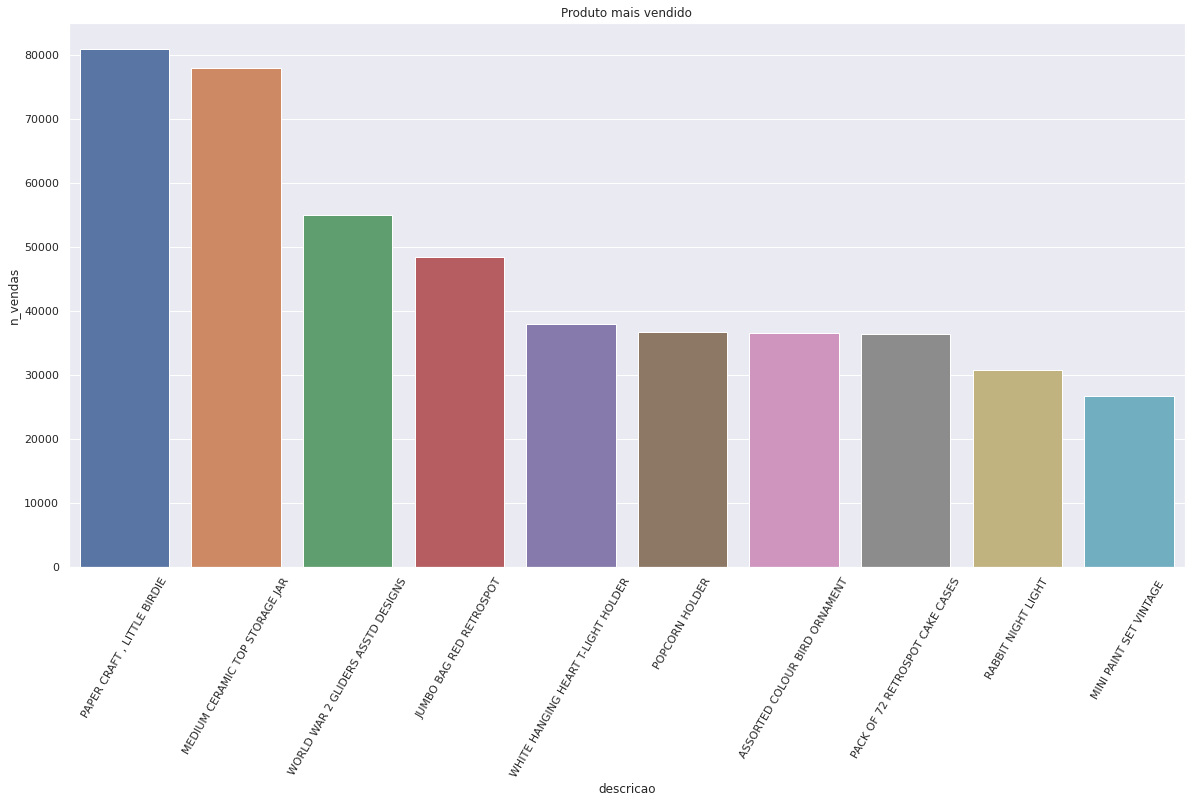

In [0]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})

graph = sns.barplot(data=produto_mais_vendido.head(10), x='descricao', y='n_vendas')

for item in graph.get_xticklabels():
    item.set_rotation(60)
    
graph.set(title='Produto mais vendido');

In [0]:
# busca do produto que da mais lucro
df[df['lucro/perda']>0].groupby('description').agg(n=('invoice_no', 'count'), lucro=('lucro/perda', 'sum')).sort_values('n', ascending=False).head(10).reset_index()

,description,n,lucro
0,WHITE HANGING HEART T-LIGHT HOLDER,2323,106292.77
1,JUMBO BAG RED RETROSPOT,2112,94340.05
2,REGENCY CAKESTAND 3 TIER,2017,174484.74
3,PARTY BUNTING,1706,99504.33
4,LUNCH BAG RED RETROSPOT,1594,35752.01
5,ASSORTED COLOUR BIRD ORNAMENT,1489,59094.93
6,SET OF 3 CAKE TINS PANTRY DESIGN,1399,38158.39
7,PACK OF 72 RETROSPOT CAKE CASES,1370,21259.10
8,LUNCH BAG BLACK SKULL.,1328,22421.21
9,NATURAL SLATE HEART CHALKBOARD,1263,28147.96


In [0]:
# busca compradores que dão mais lucro

maiores_compradores = df.groupby(['region','customer_id']).agg(lucro=('lucro/perda', 'sum')).sort_values('lucro', ascending=False).reset_index()
a = maiores_compradores.groupby('region').head(1)
a.head(10)

,region,customer_id,lucro
0,Netherlands,14646.0,280206.02
1,United Kingdom,18102.0,259657.30
4,EIRE,14911.0,143825.06
5,Australia,12415.0,124914.53
29,Sweden,17404.0,31906.82
38,Japan,12753.0,21429.39
39,Singapore,12744.0,21279.29
44,Germany,12471.0,19824.05
45,France,12731.0,18895.91
66,Spain,12540.0,13400.24


In [0]:
# busca do produto que mais vende por região

a=df.groupby(['region','description']).agg(n_vendas=('quantity', 'sum'), lucro=('lucro/perda', 'sum'), unit_cost=('unit_price', 'mean')).sort_values('n_vendas', ascending=False)

In [0]:
mais_vendas = a.groupby('region').agg(n_vendas=('n_vendas', 'first'), descricao=('descricao', 'first'), lucro=('lucro', 'first'), unit_cost=('unit_cost', 'first')).sort_values('n_vendas', ascending=False).reset_index()
mais_vendas.head(10)

,region,n_vendas,descricao,lucro,unit_cost
0,United Kingdom,80995,"PAPER CRAFT , LITTLE BIRDIE",168469.60,2.080000
1,Netherlands,4801,RABBIT NIGHT LIGHT,9568.48,2.038571
2,France,4024,RABBIT NIGHT LIGHT,7277.20,1.887973
3,Japan,3408,RABBIT NIGHT LIGHT,6100.32,1.790000
4,Australia,2952,MINI PAINT SET VINTAGE,1630.80,0.583333
5,Sweden,2916,MINI PAINT SET VINTAGE,1895.40,0.650000
6,EIRE,1800,PACK OF 72 RETROSPOT CAKE CASES,912.00,0.538182
7,Germany,1233,ROUND SNACK BOXES SET OF4 WOODLAND,3598.95,2.942920
8,Spain,729,CHILDRENS CUTLERY POLKADOT PINK,2737.35,3.990000
9,Switzerland,639,PLASTERS IN TIN WOODLAND ANIMALS,977.55,1.605556


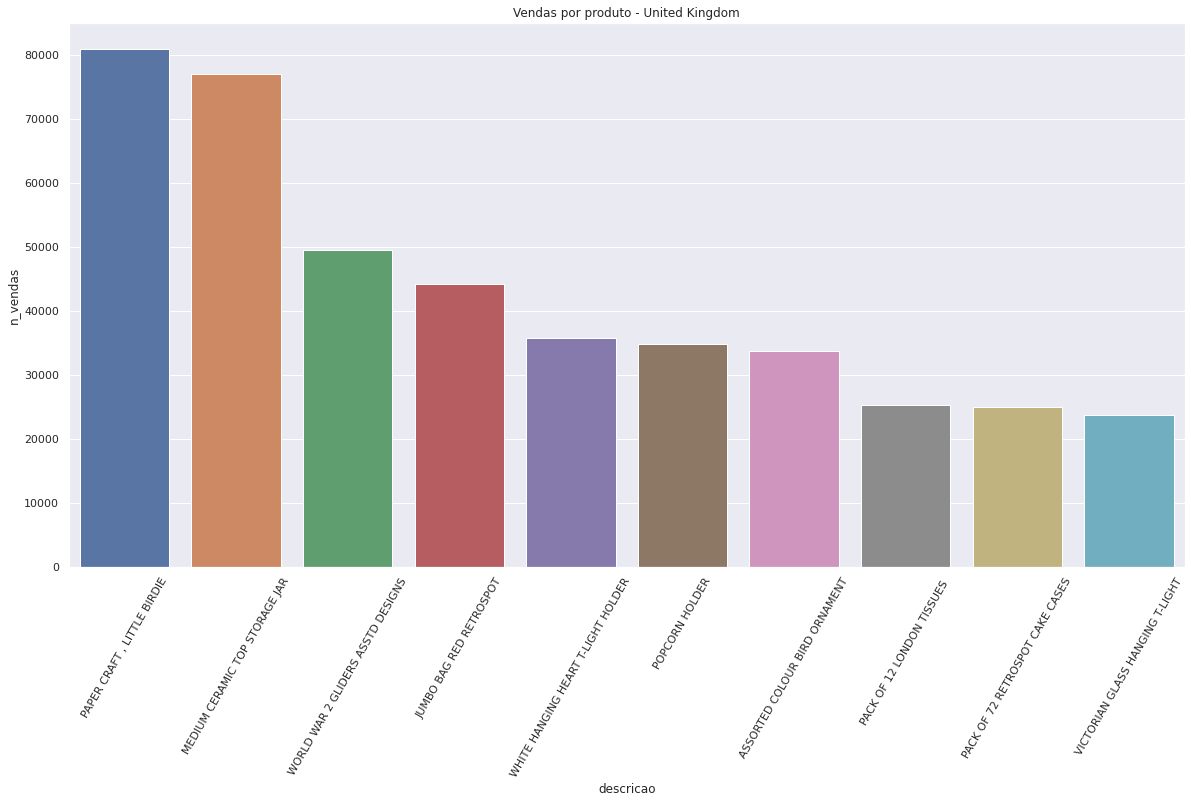

In [0]:
# produtos que mais vendem no reino unido

import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})

graph = sns.barplot(data=a[a['regiao']=='United Kingdom'].head(10), x='descricao', y='n_vendas')

for item in graph.get_xticklabels():
    item.set_rotation(60)
    
graph.set(title='Vendas por produto - United Kingdom');

In [0]:
# busca do produto que da mais lucro por região

b=a.sort_values('lucro', ascending=False)

In [0]:
maior_lucro = b.groupby('region').agg(n_vendas=('n_vendas', 'first'), lucro=('lucro', 'first'), unit_cost=('unit_cost', 'first')).sort_values('lucro', ascending=False)

In [0]:
maior_lucro.head(10)

,n_vendas,descricao,lucro,unit_cost
region,,,,
United Kingdom,708,DOTCOM POSTAGE,206248.77,291.311822
Germany,1114,POSTAGE,21001.00,20.537433
France,825,POSTAGE,15454.00,19.536667
Singapore,7,Manual,12158.90,1736.985714
Netherlands,4801,RABBIT NIGHT LIGHT,9568.48,2.038571
EIRE,693,REGENCY CAKESTAND 3 TIER,7844.25,12.131507
Japan,3408,RABBIT NIGHT LIGHT,6100.32,1.790000
Spain,209,POSTAGE,5852.00,28.000000
Hong Kong,3,Manual,5563.81,1854.603333


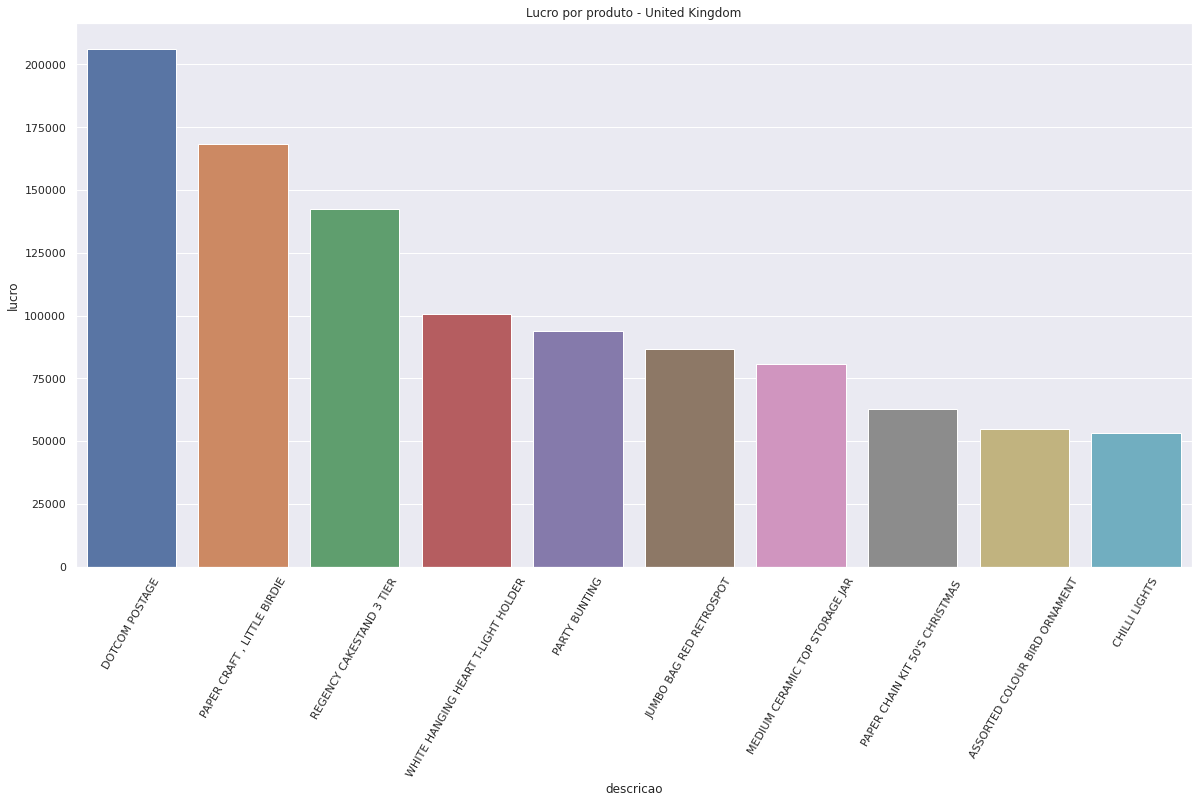

In [0]:
# produtos que dão mais lucro no reino unido

import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})

graph = sns.barplot(data=b[b['regiao']=='United Kingdom'].head(10), x='descricao', y='lucro')

for item in graph.get_xticklabels():
    item.set_rotation(60)
    
graph.set(title='Lucro por produto - United Kingdom');

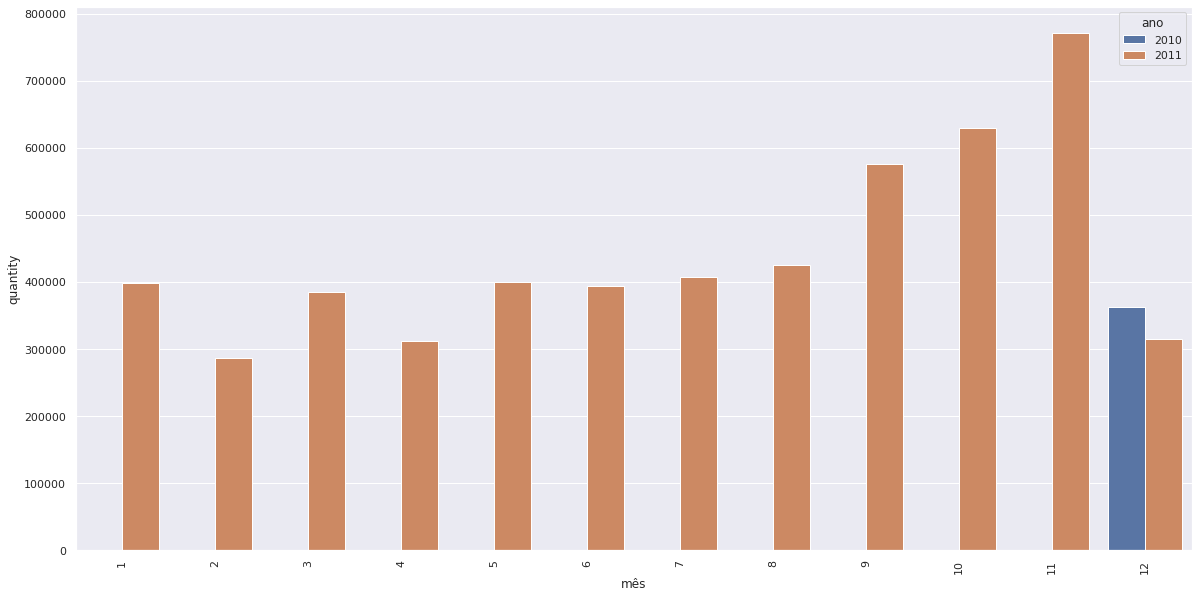

In [0]:
# vendas por mês

sns.set_style('darkgrid')
x = sns.barplot(data=df.groupby(['mês','ano']).agg(quantity=('quantity', 'sum')).sort_values('quantity', ascending=False).reset_index(), x = 'mês', y= 'quantity', hue = 'ano')
for item in x.get_xticklabels():
    item.set_rotation(90)
x;

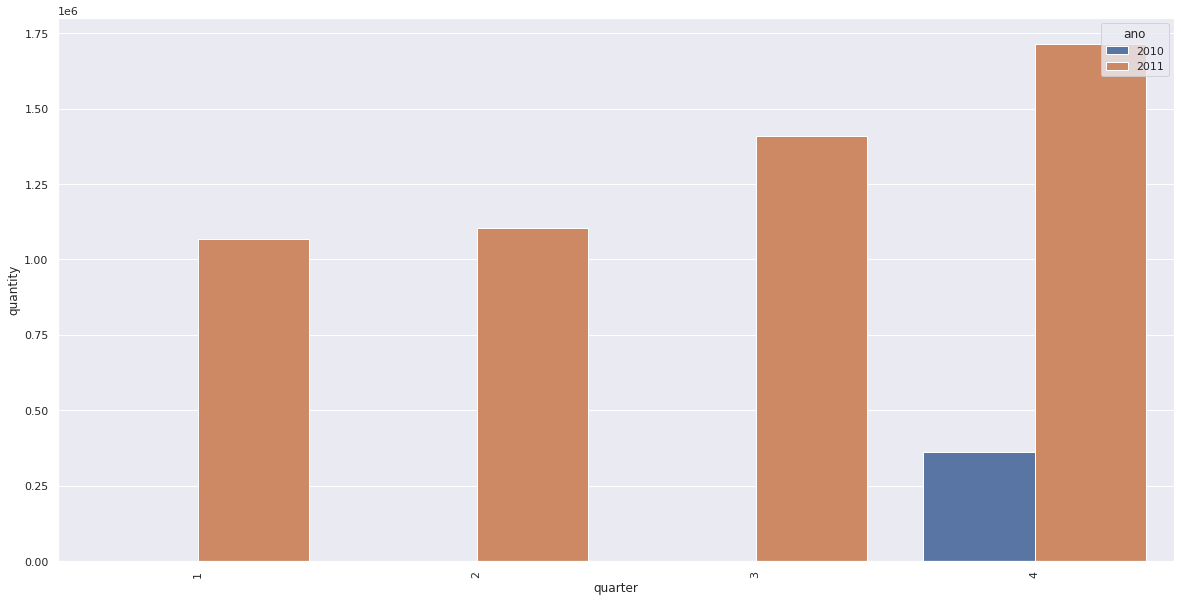

In [0]:
# vendas por quarter

sns.set_style('darkgrid')
x = sns.barplot(data=df.groupby(['quarter','ano']).agg(quantity=('quantity', 'sum')).sort_values('quantity', ascending=False).reset_index(), x = 'quarter', y= 'quantity', hue = 'ano')
for item in x.get_xticklabels():
    item.set_rotation(90)
x;

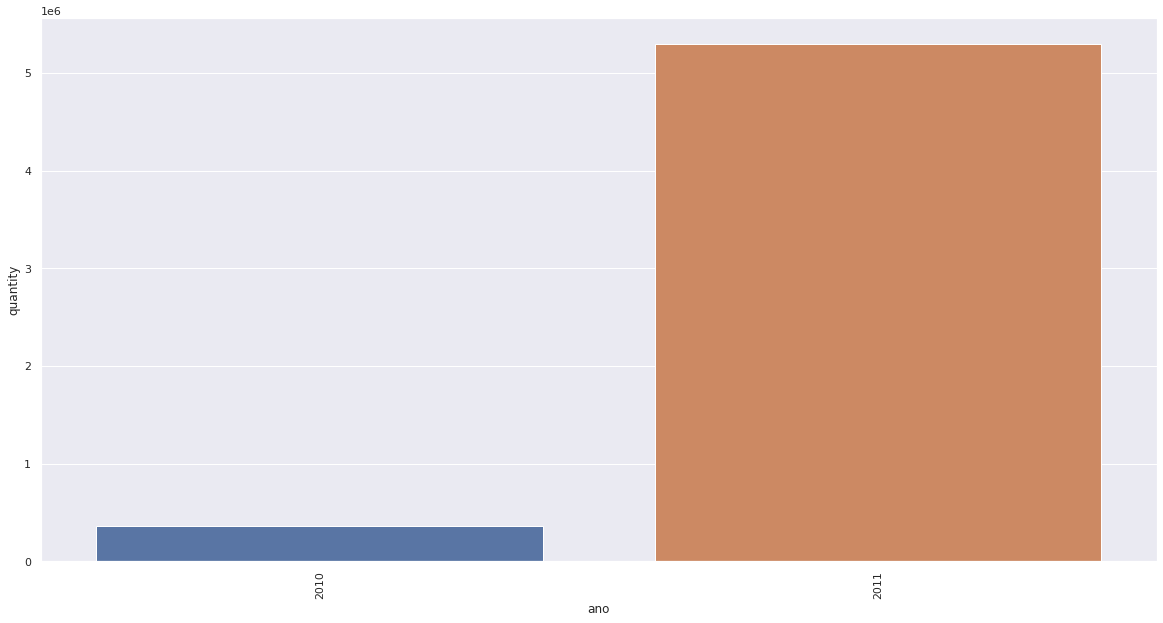

In [0]:
# vendas por ano

sns.set_style('darkgrid')
x = sns.barplot(data=df.groupby('ano').agg(quantity=('quantity', 'sum')).sort_values('quantity', ascending=False).reset_index(), x = 'ano', y= 'quantity')
for item in x.get_xticklabels():
    item.set_rotation(90)
x;

In [0]:
# correlação entre valor de venda e número de vendas

correlacao = df.groupby('description').agg(n_vendas=('quantity', 'sum'), unit_price=('unit_price', 'mean'))
correlacao[['n_vendas', 'unit_price']].corr()

,n_vendas,unit_price
n_vendas,1.000000,-0.007623
unit_price,-0.007623,1.000000
